In [1]:
import numpy as np
from math import sqrt
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from evaluacion_funciones import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carga de datos.
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target
print(np.shape(X))

(20640, 8)


In [3]:
# Métricas de evaluación.
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

In [4]:
# Construcción de los algoritmos de aprendizaje.
k = 10
base = 'KNN' + str(k)
algoritmos = {}

In [6]:
# Algoritmo 1: KNN
algoritmos[base] = KNeighborsRegressor(n_neighbors = k)

{'KNN10': KNeighborsRegressor(n_neighbors=10)}


In [8]:
# Algoritmo 2: Estandarización + KNN
pasos = [('estandarizacion', StandardScaler()),
         ('reg', algoritmos['KNN'+str(k)])]
algoritmos['Est+'+base] = Pipeline(pasos)

In [9]:
# Algoritmo 3: Estandarización + Selección atributos + KNN
pasos = [('estandarizacion', StandardScaler()),
         ('selatr', SelectPercentile(score_func=f_regression, percentile=10)),
         ('reg', algoritmos['KNN'+str(k)])]
algoritmos['Est+SelAtr+'+base] = Pipeline(pasos)

In [13]:
# Algoritmo 4: Estandarización + Selecc. atributos + KNN(p=1)
pasos = [('estandarizacion', StandardScaler()),
         ('selatr', SelectPercentile(score_func=f_regression,
           percentile=10)),
         ('reg', KNeighborsRegressor(n_neighbors = k, p=1))]
algoritmos['Est+SelAtr+'+base+'(p=1)'] = Pipeline(pasos)
print(algoritmos)

{'KNN10': KNeighborsRegressor(n_neighbors=10), 'Est+KNN10': Pipeline(steps=[('estandarizacion', StandardScaler()),
                ('reg', KNeighborsRegressor(n_neighbors=10))]), 'Est+SelAtr+KNN10': Pipeline(steps=[('estandarizacion', StandardScaler()),
                ('selatr',
                 SelectPercentile(score_func=<function f_regression at 0x000001C4A90A4F70>)),
                ('reg', KNeighborsRegressor(n_neighbors=10))]), 'Est+SelAtr+KNN10(p=1)': Pipeline(steps=[('estandarizacion', StandardScaler()),
                ('selatr',
                 SelectPercentile(score_func=<function f_regression at 0x000001C4A90A4F70>)),
                ('reg', KNeighborsRegressor(n_neighbors=10, p=1))])}


In [11]:
# Validación y obtención de las predicciones del modelo.
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X, y, cv=KFold(n_splits=10, shuffle=True,random_state=42))

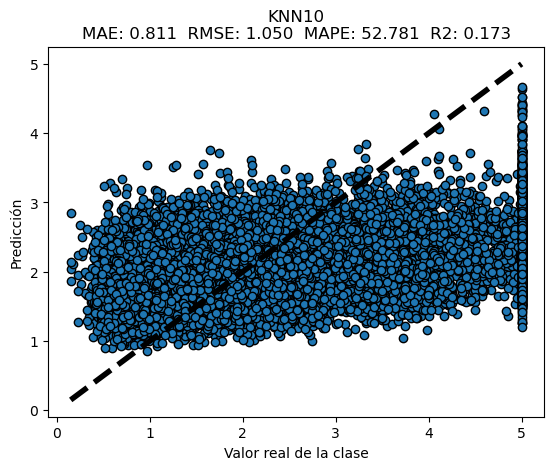

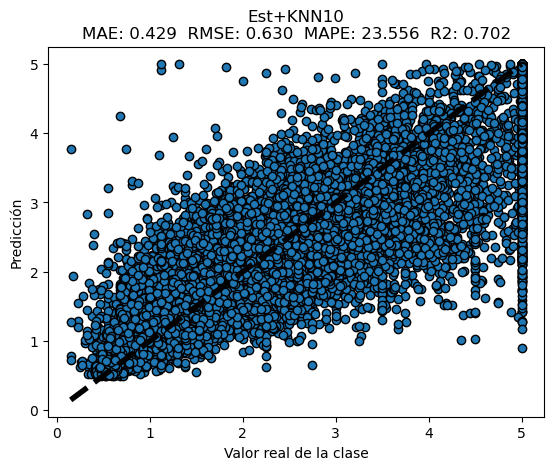

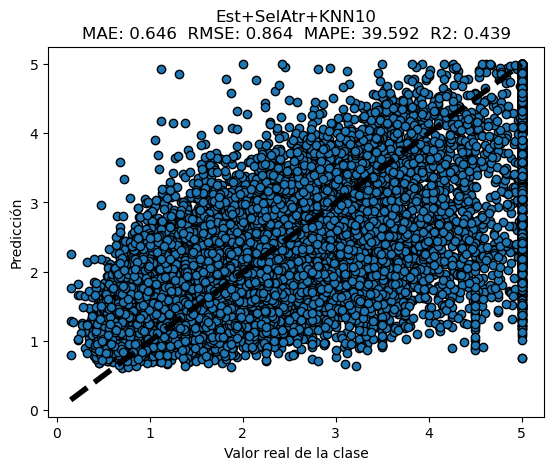

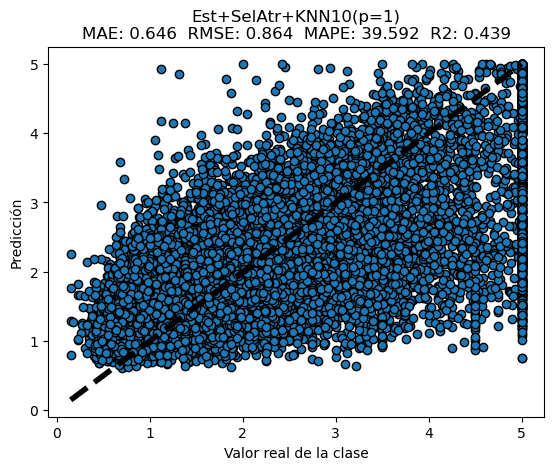

In [12]:
# Evaluación y presentación de resultados.
for nombre, alg in algoritmos.items():
    results = evaluacion(y, y_pred[nombre], metricas)
    grafica_real_vs_pred(y, y_pred[nombre], results, nombre)